In [1]:
##########################################################################
# Created on Sat Nov 07 16:54:45 2021                                    #
# Python for Financial Analysis and Risk Management                      #
# @author: Meng Lipeng (FRM, CFA)                                        #
##########################################################################

# 8.4.1.Main variables of portfolio

## 1.Expected return of portfolio

Expected return of portfolio is \
$$E(R_p)=E(\sum_{i=1}^N \omega _i R_i)=\sum_{i=1}^N\omega_iE(R_i)=\left[\omega_1,\omega_2,\cdots,\omega_N\right]\left[E(R_1),E(R_2),\cdots,E(R_N)\right]^T\tag{8-44}$$\
where,\
$\omega_i$:weight of the ith stock in portfolio and satisfies $\sum_{i=1}^N\omega_i=1$\
$E(R_i)$:expected return of the ith stock in portfolio\
$[E(R_1),E(R_2),\cdots,E(R_N)]^T$:transpose vector of expected return

Stock return is calculated as below\
$R_{it}=\ln\frac{P_{it}}{P_{it-1}}\tag{8-45}$\
where,\
$P_{it}$:price of ith stock at t\
$P_{it-1}$:price of ith stock at t-1


In [5]:
import numpy.random as npr
import numpy as np

x=npr.rand(5)
weight=x/np.sum(x)
weight

array([0.29591204, 0.23204926, 0.10418344, 0.20070541, 0.16714985])

In [6]:
round(sum(weight),2)

1.0

## 2.Volatility of portfolio(risk)

$\omega=\left[\omega_{1},\omega_{2},\cdot\cdot\cdot,\omega_{N}\right]$\
$\varSigma=\begin{bmatrix}\sigma_{1}^{2} & \sigma_{12}& \cdots&\sigma_{1N}\\\sigma_{21} & \sigma_{2}^{2}&\cdots&\sigma_{2N}\\\vdots&\vdots&\ddots&\vdots\\\sigma_{N1}&\sigma_{N2}&\cdots&\sigma_{N}^{2} \end{bmatrix}$\
$\sigma_{ij}=Cov(R_{i},R_{j})$\
$$\sigma_{P}=\sqrt{\omega\varSigma\omega^{T}}\tag{8-52}$$

## 3.Case study

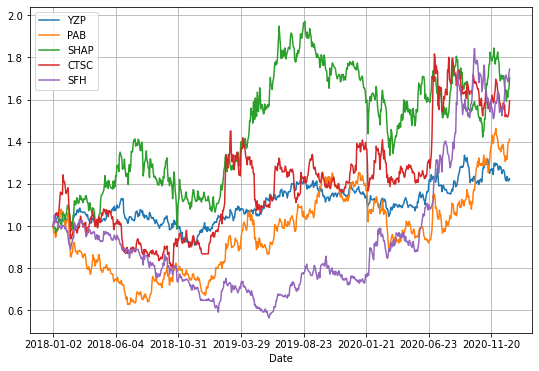

In [1]:
import pandas as pd

data_stocks=pd.read_excel('Close price of 5 stocks(2018-2020).xlsx',engine='openpyxl',sheet_name="Sheet1",header=0,index_col=0)
# Set the stock price of first day to 1 and plot
(data_stocks/data_stocks.iloc[0]).plot(figsize=(9,6),grid=True)

In [3]:
import numpy as np

#Calculate daily return
R=np.log(data_stocks/data_stocks.shift(1))
R.describe()

,YZP,PAB,SHAP,CTSC,SFH
count,729.000000,729.000000,729.000000,729.000000,729.000000
mean,0.000278,0.000473,0.000731,0.000640,0.000763
std,0.011384,0.020981,0.022290,0.023273,0.020070
min,-0.060731,-0.105075,-0.105361,-0.105527,-0.072259
25%,-0.005946,-0.011458,-0.012341,-0.010551,-0.011087
50%,0.000000,-0.000616,-0.000357,0.000000,-0.000595
75%,0.006942,0.011988,0.011941,0.011643,0.009734
max,0.042845,0.095629,0.088763,0.095450,0.095287


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f480d394a20>,
      dtype=object)

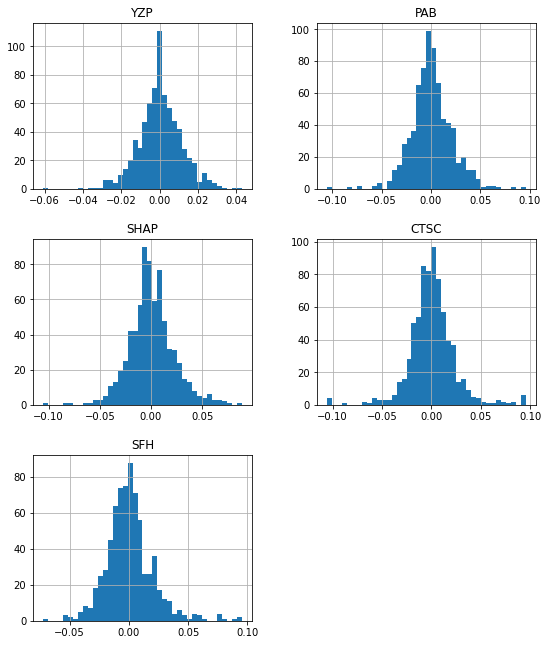

In [4]:
R.hist(bins=40,figsize=(9,11))

In [5]:
R_mean=R.mean()*252 #annualize average return
print(R_mean)

YZP     0.070170
PAB     0.119183
SHAP    0.184250
CTSC    0.161250
SFH     0.192401
dtype: float64


In [6]:
R_vol=R.std()*np.sqrt(252) #annualize volotility
print(R_vol)

YZP     0.180715
PAB     0.333064
SHAP    0.353851
CTSC    0.369450
SFH     0.318603
dtype: float64


In [7]:
R_cov=R.cov()*252 #annualize covariance matrix
print(R_cov)

           YZP       PAB      SHAP      CTSC       SFH
YZP   0.032658  0.014852  0.015852  0.015621  0.008261
PAB   0.014852  0.110932  0.041887  0.075536  0.026004
SHAP  0.015852  0.041887  0.125210  0.045684  0.029763
CTSC  0.015621  0.075536  0.045684  0.136494  0.038219
SFH   0.008261  0.026004  0.029763  0.038219  0.101508


In [8]:
R_corr=R.corr()
print(R_corr)

           YZP       PAB      SHAP      CTSC       SFH
YZP   1.000000  0.246752  0.247891  0.233967  0.143479
PAB   0.246752  1.000000  0.355408  0.613862  0.245055
SHAP  0.247891  0.355408  1.000000  0.349454  0.264003
CTSC  0.233967  0.613862  0.349454  1.000000  0.324695
SFH   0.143479  0.245055  0.264003  0.324695  1.000000


In [9]:
n=5
w=np.ones(n)/n #equal weight

R_port=np.sum(w*R_mean)
print('Annualized expected return of portfolio is ',round(R_port,4))

Annualized expected return of portfolio is  0.1455


In [10]:
vol_port=np.sqrt(np.dot(w,np.dot(R_cov,w.T)))
print('Annualized voloatility of portfolio is ',round(vol_port,4))

Annualized voloatility of portfolio is  0.2126


# 8.4.2.Feasible set and efficient frontier

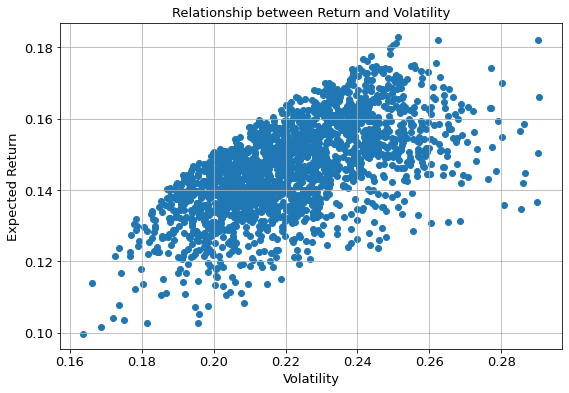

In [17]:
I=2000
Rp_list = []
Vp_list = []
for i in np.arange(I):
    x = np.random.random(n)
    weights = x / np.sum(x)
    Rp_list.append(np.sum(weights * R_mean))
    Vp_list.append(np.sqrt(np.dot(weights, np.dot(R_cov, weights.T))))

import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
plt.scatter(Vp_list,Rp_list)
plt.xlabel('Volatility',fontsize=13)
plt.ylabel('Expected Return',fontsize=13,rotation=90)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Relationship between Return and Volatility',fontsize=13)
plt.grid('True')
plt.show()

Optimization Function of efficient frontier\
$$\mathop{min}\limits_{\omega_{i}}\sigma_{P}=\mathop{min}\limits_{\omega_{i}}\sqrt{\sum_{i=1}^N\sum_{j=1}^N\omega_{i}\omega_{j}Cov(R_{i},R_{j})}\tag{8-53}$$\
Constraint Condition\
$\sum_{i=1}^N \omega_{i}=1$\
$\omega_{i}>0$(short sale is not allowed)\
$E(R_{p})=E(\sum_{i=1}^N\omega_{i}R_{i})=Constant$

In [14]:
import scipy.optimize as sco

def f(w): #define optimize function
    w = np.array(w)
    Rp_opt = np.sum(w * R_mean)
    Vp_opt = np.sqrt(np.dot(w, np.dot(R_cov, w.T)))
    return np.array([Rp_opt, Vp_opt])

def Vmin_f(w): #define min volatility function
    return f(w)[1]

cons = ({'type':'eq','fun':lambda x: np.sum(x)-1}, {'type':'eq','fun':lambda x: f(x)[0]-0.15})#constraint condition
bnds = ((0,1),(0,1),(0,1),(0,1),(0,1)) #bounds of weight
w0=np.array([0.2,0.2,0.2,0.2,0.2])#initial value of weight

result = sco.minimize(fun=Vmin_f,x0=w0,method='SLSQP',bounds = bnds,constraints=cons)
print('Portfolio volatility when expected return is 15%', round(result['fun'],4))
print('Weight of YAP when R = 15% is: ', round(result['x'][0], 4))
print('Weight of PAB when R = 15% is: ', round(result['x'][1], 4))
print('Weight of SHAP when R = 15% is: ', round(result['x'][2], 4))
print('Weight of CTSC when R = 15% is: ', round(result['x'][3], 4))
print('Weight of SFH when R = 15% is: ', round(result['x'][-1], 4))

Portfolio volatility when expected return is 15% 0.1984
Weight of YAP when R = 15% is:  0.3054
Weight of PAB when R = 15% is:  0.0045
Weight of SHAP when R = 15% is:  0.2232
Weight of CTSC when R = 15% is:  0.0938
Weight of SFH when R = 15% is:  0.3731


In [16]:
#Calculate weight when min volatility
cons_vmin = ({'type':'eq','fun':lambda x: np.sum(x)-1}) #Only sum of weight = 1

result_vmin = sco.minimize(fun=Vmin_f,x0=w0,method='SLSQP',bounds=bnds,constraints=cons_vmin)
Vp_vmin = result_vmin['fun']
Rp_vmin = np.sum(R_mean*result_vmin['x'])

print('Portfolio Return when min volatility: ', round(Rp_vmin, 4))
print('Min volatility: ', round(Vp_vmin, 4))
print('Weight of YAP when Min volatility is: ', round(result_vmin['x'][0], 4))
print('Weight of PAB when Min volatility is: ', round(result_vmin['x'][1], 4))
print('Weight of SHAP when Min volatility is: ', round(result_vmin['x'][2], 4))
print('Weight of CTSC when Min volatility is: ', round(result_vmin['x'][3], 4))
print('Weight of SFH when Min volatility is: ', round(result_vmin['x'][-1], 4))

Portfolio Return when min volatility:  0.1007
Min volatility:  0.162
Weight of YAP when Min volatility is:  0.6968
Weight of PAB when Min volatility is:  0.082
Weight of SHAP when Min volatility is:  0.054
Weight of CTSC when Min volatility is:  0.0034
Weight of SFH when Min volatility is:  0.1637


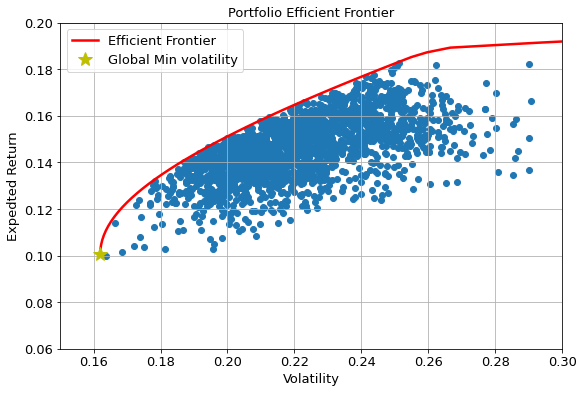

In [19]:
Rp_target = np.linspace(Rp_vmin,0.3,100) # target return array linspace(start, end, nums)
Vp_target = []

for r in Rp_target:
    cons_new = ({'type':'eq','fun':lambda x: np.sum(x)-1}, {'type':'eq','fun':lambda x: f(x)[0]-r})
    result_new = sco.minimize(fun=Vmin_f,x0=w0,method='SLSQP',bounds=bnds,constraints=cons_new)
    Vp_target.append(result_new['fun'])

plt.figure(figsize=(9, 6))
plt.scatter(Vp_list,Rp_list)
plt.plot(Vp_target,Rp_target,'r-',label = 'Efficient Frontier',lw = 2.5)
plt.plot(Vp_vmin,Rp_vmin,'y*',label = 'Global Min volatility',markersize = 14)
plt.xlabel('Volatility',fontsize = 13)
plt.ylabel('Expedted Return',fontsize=13,rotation=90)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim(0.15,0.3)
plt.ylim(0.06,0.2)
plt.title('Portfolio Efficient Frontier', fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

# 8.4.3.Capital market line

Expression of CML is as below:\
$$E(R_{P})=R_{F}+\left[\frac{E(R_{M})-R_{F}}{\sigma_{M}}\right]\sigma_{P}\tag{8-54}$$
where,\
$R_F$:risk free rate\
$E(R_M)$:expected return of market portfolio\
$\sigma_M$:volatility of market portfolio\
$\frac{E(R_{M})-R_{F}}{\sigma_{M}}$:slope of CML, which is also called Sharpe ratio

Since risk free rate is always known, the optimization function is max Sharp Ratio which is showed below.\
$$\mathop{max}\limits_{\omega_{i}}\frac{E(R_{P})-R_{f}}{\sigma_{P}}\tag{8-55}$$\
Constraint Condition\
$\sum_{i=1}^N \omega_{i}=1$\
$\omega_{i}>0$

In [20]:
Rf=0.0385 #Risk free rate

def F(w): #define a new optimize function
    w=np.array(w)
    Rp_opt=np.sum(w*R_mean)
    Vp_opt=np.sqrt(np.dot(w,np.dot(R_cov,w.T)))
    Slope=(Rp_opt-Rf)/Vp_opt #Slope of CML
    return np.array([Rp_opt,Vp_opt,Slope])

def Slope_F(w): # define a function which is min(-Slope), hence max(Slope)
    return -F(w)[-1]

cons_Slope = ({'type':'eq','fun':lambda x: np.sum(x)-1})
result_Slope = sco.minimize(fun=Slope_F,x0=w0,method='SLSQP',bounds=bnds,constraints=cons_Slope)

Slope = -result_Slope['fun'] #slope of CML
print('Slope of CML is ',round(Slope,4))
Wm=result_Slope['x']
print('Weight of YAP in market portfolo is: ', round(Wm[0], 4))
print('Weight of PAB in market portfolo is: ', round(Wm[1], 4))
print('Weight of SHAP in market portfolo is: ', round(Wm[2], 4))
print('Weight of CTSC in market portfolo is: ', round(Wm[3], 4))
print('Weight of SFH in market portfolo is: ', round(Wm[-1], 4))

Slope of CML is  0.5762
Weight of YAP in market portfolo is:  0.0682
Weight of PAB in market portfolo is:  0.0
Weight of SHAP in market portfolo is:  0.3166
Weight of CTSC in market portfolo is:  0.1261
Weight of SFH in market portfolo is:  0.4891


In [21]:
Rm = np.sum(R_mean*Wm) #Expected return of market portfolio
Vm = (Rm-Rf)/Slope #Volatility of market portfolio
print('Expected return of market portfolio: ', round(Rm, 4))
print('Volatility of market portfolio: ', round(Vm, 4))

Expected return of market portfolio:  0.1776
Volatility of market portfolio:  0.2413


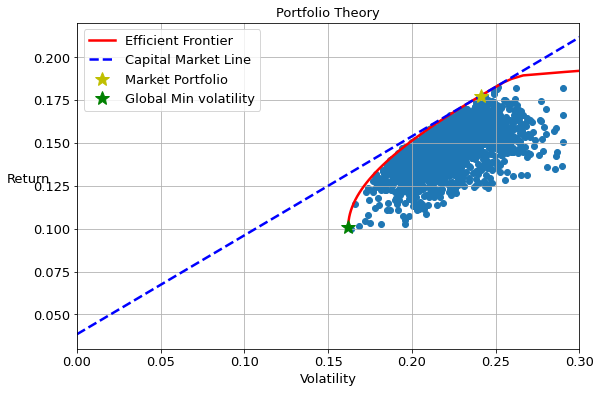

In [22]:
Rp_CML = np.linspace(Rf,0.25,200)
Vp_CML = (Rp_CML-Rf)/Slope

plt.figure(figsize = (9, 6))
plt.scatter(Vp_list, Rp_list)
plt.plot(Vp_target, Rp_target, 'r-', label = 'Efficient Frontier', lw = 2.5)
plt.plot(Vp_CML, Rp_CML, 'b--', label = 'Capital Market Line', lw = 2.5)
plt.plot(Vm, Rm, 'y*', label = 'Market Portfolio', markersize = 14)
plt.plot(Vp_vmin, Rp_vmin, 'g*', label = 'Global Min volatility', markersize = 14)
plt.xlabel('Volatility', fontsize = 13)
plt.ylabel('Return', fontsize = 13, rotation = 0)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlim(0.0, 0.3)
plt.ylim(0.03, 0.22)
plt.title('Portfolio Theory', fontsize = 13)
plt.legend(fontsize = 13)
plt.grid()
plt.show()